<a href="https://colab.research.google.com/github/Jyoti1706/tensorflow-certification/blob/main/01_Neural_Network_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow

Regression is: predicting a number(dependent variable) with the help of independen variables

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

### Input and Output for (NNR) Neural Network Regression with TF

![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)
*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.


| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).



In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
import numpy as np
import matplotlib.pyplot as plt

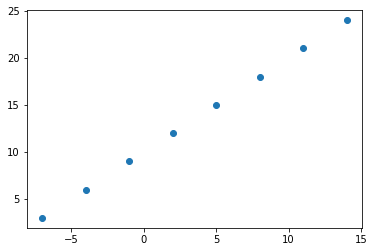

In [4]:
## Create the input feature
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [5]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
## Converting numpy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
print(input_shape, output_shape)

() ()


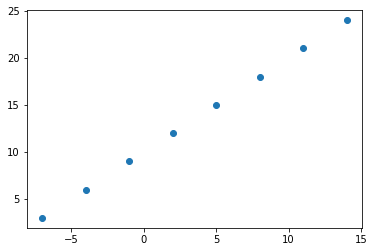

In [8]:
plt.scatter(X,y)

### Steps in modelling with tensorflow

1. **Creating a model** - Define  the input and output layers, as well as the hidden layer of deep learning.
2. **Compiling a model** - define loss function ( functions which tells model how wrong it is) and optimizer(tells model how to improve the pattern learning).
3. **Fitting a model** - letting the modeltry to find pattern between X & y (features and labels
4. **Evaluate model** - on testing data

### params defination

1. **Compiling a model**

- Loss function --> our model use to improve its performance.

- Metrics --> it's for humans to check our performance of your model.

2. **fit a model**

- Epocs -->how many time model will go through the training example


In [9]:
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# Check out X and y
print(X, y)
# Make a prediction with the model
model.predict([17.0])

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64) tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)


array([[12.716021]], dtype=float32)

## Imporving Model

we can improve model at various stages

1. while **creating a models**: 
  - we can add more layers, hidden layers, we can increase number of neurons in each layer.   
  - within each layer change activation function.


2. while **Compiling a model** - 
  - change optimization function 
  - change learmning rate of optimization function

3. while **fitting the model**
  - fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).


![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

In [11]:
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 220ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0

In [12]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [25]:
# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=None),
  #tf.keras.layers.Dense(100, activation="relu"),
  #tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 266ms/step - loss: 13.9408 - mae: 13.9408
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4361 - mae: 13.4361
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9324 - mae: 12.9324
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.4272 - mae: 12.4272
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9177 - mae: 11.9177
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.4014 - mae: 11.4014
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8755 - mae: 10.8755
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3375 - mae: 10.3375
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7844 - mae: 9.7844
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2135 - mae: 9.2135
Epoch 11/100
1/1 [==============================] - 0s 8ms/s

In [26]:
model.predict([17.0])

array([[29.61414]], dtype=float32)

In [33]:
# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 856ms/step - loss: 12.3975 - mae: 12.3975
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3544 - mae: 12.3544
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 12.3113 - mae: 12.3113
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.2679 - mae: 12.2679
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 12.2242 - mae: 12.2242
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1806 - mae: 12.1806
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1372 - mae: 12.1372
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0950 - mae: 12.0950
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 12.0524 - mae: 12.0524
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 12.0094 - mae: 12.0094
Epoch 11/100
1/1 [==============================] - 0s 17ms/ste

In [34]:
model.predict([17.0])

array([[19.531925]], dtype=float32)